# Analyse des acccidents d'Avions ; choix des meilleurs modèles à commercialiser !

# Introduction:
Le niveau de sécurité et de fiabilité des avions sont des facteurs essentiels pour des entreprises d’achat et d’exploitation de ces derniers. Et leur pire ennemi sont des accidents qui peuvent ternir leurs réputations, provoquer des énormes pertes, voire leur faillite. Chaque année, l’analyse des accidents d’avion permet d’identifier les facteurs de risque, d’évaluer les performances des modèles existants et d’orienter des entreprises à faire le meilleur choix possible dans un environnement où la compétition commerciale et les exigences de la clientèle sont en constante évolution. De ce fait, l’entreprise Sky_Horizon, dans l’objectif de diversifier son portefeuille, veut se développer dans de nouveaux secteurs d’activité, particulièrement dans l’achat et l’exploitation d’avions pour des entreprises commerciales et privées. Sachant qu’il ne sait rien des risques potentiels des avions, nous sommes chargés de déterminer quels avions présentent le risque le plus faible pour l’entreprise pour se lancer dans cette nouvelle aventure. De ce fait, notre étude se penche sur une analyse approfondie et détaillée des accidents d’avions sur plusieurs décennies, afin de dégager des tendances, des causes et d’orienter des choix stratégiques pour permettre à l’entreprise Sky_Horizon de prendre des décisions éclairées et basées sur des données pour l’achat et l’exploitation des modèles d’avions les plus sûrs et performants à commercialiser aux entreprises commerciales et privées afin de diversifier son portefeuille.

Objectif :
1) Déterminer quels sont les modèles d'avions qui représentent le risque le plus faible pour l'entreprise.

Méthodologie :
1) Data Cleaning ; pour supprimer les doublons, les données manquantes, les données qui ne seront pas utiles pour cette étude et d’autres données qui peuvent biaiser le résultat, etc.
2) Data Visualisation and Exploratory ; pour découvrir des tendances cachées, des vérités qui se cachent derrière les données, etc.
3) Statistiques descriptives
4) Analyse qualitative
5) Etc.


In [2]:
#Importer les Biblithques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number
import warnings 
warnings.filterwarnings("ignore")

# Vues générales des Données

In [3]:
#Read the csv
df = pd.read_csv("AviationData.csv", encoding="latin1", low_memory=False) 

In [4]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(88889, 31)

Dans le resultat qui s'affiche c-dessus, notre DataFrame contient 88889 lignes et 31 collones

In [6]:
# For the first 10 rows
df.head(10) 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [7]:
# Afficher les 10 dernieres lignes
df.tail(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88879,20221219106472,Accident,DCA23LA096,2022-12-18,"Kahului, HI",United States,NaN,NaN,NaN,NaN,...,NaN,HAWAIIAN AIRLINES INC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88880,20221219106477,Accident,WPR23LA071,2022-12-18,"San Manual, AZ",United States,NaN,NaN,NaN,NaN,...,Personal,Chandler Air Service,0.0,0.0,0.0,3.0,NaN,NaN,NaN,20-12-2022
88881,20221221106483,Accident,CEN23LA067,2022-12-21,"Auburn Hills, MI",United States,NaN,NaN,NaN,NaN,...,Personal,Pilot,0.0,1.0,0.0,0.0,NaN,NaN,NaN,22-12-2022
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [8]:
# vues statistiques descriptive
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# Nettoyage et Analyse des Données / Data Cleaning
Dans l'ensemble des données du DataFrame, nous allons verifier les donnees, les variables ainsi que leurs contenus, de maniere a laisser que les donnees necessaires pour realiser notre analyse.

In [9]:
# Voyons les variables ou columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Toutes ces variables ne seront pas necessaires pour la realisation de notre, beaucoup de varaibles seront supprimees

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [11]:
# Vérifions les valeurs de Event.Id
df["Event.Id"].value_counts

<bound method IndexOpsMixin.value_counts of 0        20001218X45444
1        20001218X45447
2        20061025X01555
3        20001218X45448
4        20041105X01764
              ...      
88884    20221227106491
88885    20221227106494
88886    20221227106497
88887    20221227106498
88888    20221230106513
Name: Event.Id, Length: 88889, dtype: object>

In [12]:
# Voyons les valeurs uniques
df["Event.Id"].nunique() 

87951

Puisque les résultats ci_dessus présentent une différence entre le nombre de valeurs de la colonne et ses valeurs uniques, donc il y a doublons.

# Affichons les doublons

In [13]:
df[df.duplicated(subset="Event.Id", keep=False)] 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
117,20020917X01908,Accident,DCA82AA012B,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Personal,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
118,20020917X01908,Accident,DCA82AA012A,1982-01-19,"ROCKPORT, TX",United States,NaN,NaN,RKP,ARANSAS COUNTY AIRPORT,...,Executive/corporate,NaN,3.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,19-01-1983
153,20020917X02259,Accident,LAX82FA049A,1982-01-23,"VICTORVILLE, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,4.0,0.0,VMC,Unknown,Probable Cause,23-01-1983
158,20020917X02400,Accident,MIA82FA038B,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Cruise,Probable Cause,23-01-1983
159,20020917X02400,Accident,MIA82FA038A,1982-01-23,"NEWPORT RICHEY, FL",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Approach,Probable Cause,23-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88796,20221121106336,Accident,WPR23LA041,2022-11-18,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,...,Instructional,702 HELICOPTER INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,07-12-2022
88797,20221122106340,Incident,DCA23WA071,2022-11-18,"Marrakech,",Morocco,NaN,NaN,NaN,NaN,...,NaN,British Airways,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88798,20221122106340,Incident,DCA23WA071,2022-11-18,"Marrakech,",Morocco,NaN,NaN,NaN,NaN,...,NaN,Valair Private Jets,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88813,20221123106354,Accident,WPR23LA045,2022-11-22,"San Diego, CA",United States,323414N,1165825W,SDM,Brown Field Municipal Airport,...,Instructional,HeliStream Inc.,0.0,0.0,0.0,4.0,VMC,NaN,NaN,22-12-2022


# Maintenant supprimons les doublons

In [14]:
df = df.drop_duplicates(subset="Event.Id", keep="first")
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


# Vérifions le type de chaque colonne

In [15]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 87951 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87951 non-null  object 
 1   Investigation.Type      87951 non-null  object 
 2   Accident.Number         87951 non-null  object 
 3   Event.Date              87951 non-null  object 
 4   Location                87899 non-null  object 
 5   Country                 87729 non-null  object 
 6   Latitude                34212 non-null  object 
 7   Longitude               34203 non-null  object 
 8   Airport.Code            49484 non-null  object 
 9   Airport.Name            52031 non-null  object 
 10  Injury.Severity         86961 non-null  object 
 11  Aircraft.damage         84848 non-null  object 
 12  Aircraft.Category       32181 non-null  object 
 13  Registration.Number     86601 non-null  object 
 14  Make                    87888 non-null  obj

On constate que la colonne Event.Date est de type Object, alors convertissons la en Datetime

In [16]:
df["Event.Date"]=pd.to_datetime(df["Event.Date"], errors="coerce")  

In [17]:
print(df["Event.Date"].dtype)
print(df["Event.Date"].head())
print("Les valeurs non convertis(NaT) :", df["Event.Date"].isna().sum()) 

datetime64[ns]
0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: Event.Date, dtype: datetime64[ns]
Les valeurs non convertis(NaT) : 0


# Gestion des valeurs manquantes

In [18]:
#Verifions de le nombre valeurs manquantes pour chaque colonne
df.isna().sum() 

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     222
Latitude                  53739
Longitude                 53748
Airport.Code              38467
Airport.Name              35920
Injury.Severity             990
Aircraft.damage            3103
Aircraft.Category         55770
Registration.Number        1350
Make                         63
Model                        92
Amateur.Built               100
Number.of.Engines          6027
Engine.Type                7043
FAR.Description           56036
Schedule                  75591
Purpose.of.flight          6122
Air.carrier               71418
Total.Fatal.Injuries      11267
Total.Serious.Injuries    12322
Total.Minor.Injuries      11760
Total.Uninjured            5863
Weather.Condition          4473
Broad.phase.of.flight     27114
Report.Status              6364
Publication.Date          13599
dtype: i

In [20]:
#Voyons le pourcentage des valeurs manquantes pour chaque colonne 
#avec (VM) pour valeur manquante
VM = pd.DataFrame({"missing value": df.isna().sum(),
                   "%missing": df.isna().mean() * 100
                  }).sort_values("%missing", ascending=False)
VM

,missing value,%missing
Schedule,75591,85.946720
Air.carrier,71418,81.202033
FAR.Description,56036,63.712749
Aircraft.Category,55770,63.410308
Longitude,53748,61.111301
Latitude,53739,61.101068
Airport.Code,38467,43.736853
Airport.Name,35920,40.840923
Broad.phase.of.flight,27114,30.828530
Publication.Date,13599,15.462019


Nous venons de voir que plus de cinq colonnes ont un pourcentage de valeurs manquantes superieures a 60, or nous savons bien que les valeurs manquantes peuvent biaiser les résultats, donc il est important d'évidter les colonnes qui présentent un grand nombre de valeurs manquantes. En outre, les colonnes qui sont pas important pour l'objectif de notre étude peuvent supprimer aussi.

In [21]:
# Supprimons les colonnes qui ont plus de 60% de valeurs manquantes
df = df.drop(columns=VM[VM["%missing"]>60].index)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,...,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,...,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [22]:
#Voyons le nombre de colonne restantes
print(f"colonnes restantes : {df.shape[1]}")  

colonnes restantes : 25


In [23]:
# Afficher les colonnes restantes
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [24]:
# Supprimer des colonnes qui ne sont pas importants pour l'objectif de l'etude
df = df.drop(["Accident.Number", "Airport.Code", "Airport.Name", "Registration.Number", "Report.Status", "Publication.Date"], axis=1)

In [25]:
#Voyons le nombre de colonne restantes
print(f"colonnes restantes : {df.shape[1]}") 

colonnes restantes : 19


In [26]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

In [27]:
#Allons voir la colonne d'investigation pour voir comment a eu lieu les evenements
df["Investigation.Type"].value_counts()

Investigation.Type
Accident    84190
Incident     3761
Name: count, dtype: int64

In [28]:
df.shape

(87951, 19)

In [29]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87951 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                87951 non-null  object        
 1   Investigation.Type      87951 non-null  object        
 2   Event.Date              87951 non-null  datetime64[ns]
 3   Location                87899 non-null  object        
 4   Country                 87729 non-null  object        
 5   Injury.Severity         86961 non-null  object        
 6   Aircraft.damage         84848 non-null  object        
 7   Make                    87888 non-null  object        
 8   Model                   87859 non-null  object        
 9   Amateur.Built           87851 non-null  object        
 10  Number.of.Engines       81924 non-null  float64       
 11  Engine.Type             80908 non-null  object        
 12  Purpose.of.flight       81829 non-null  object     

# Création d'une colonne qui contient les années extrait des dates (Event.Year)

In [30]:
#Create a Year column 
df["Event.Year"]=df.loc[:,("Event.Date")].dt.year
df["Event.Year"].unique() 

array([1948, 1962, 1974, 1977, 1979, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022])

La creation de cette colonne est importante pour voir l'evolution des accident aucours des annees

In [31]:
#Voyons les colonnes
df.columns 

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Event.Year'],
      dtype='object')

In [32]:
df.shape

(87951, 20)

Nous venons de voir que la colonne vient de s'ajouter

# Voyons quelques colonnes importantes pour l'analyse

In [33]:
# Voyons la colonne Country
df["Country"].value_counts() 

Country
United States                       81355
Brazil                                373
Mexico                                356
Canada                                355
United Kingdom                        341
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64

# Uniformisons

Maintenant, uniformisons au niveau des colonnes type (Object) pour eviter les doublons invisibles causes par des majuscules/minuscules

In [35]:
# Identification des colonnes de type (Object)
cat_cols = df.select_dtypes(include="object").columns
# Appliation de str.lower() a toutes ces colonnes
for col in cat_cols:
    df[col] = df[col].str.lower() 

In [36]:
df["Model"].value_counts() 

Model
152          2313
172          1743
172n         1144
pa-28-140     925
150           820
             ... 
pa60-601p       1
dsa-1-g         1
sgs233a         1
seabird         1
m-8 eagle       1
Name: count, Length: 11563, dtype: int64

In [37]:
#Allons voir la repartition des Models
df["Model"].value_counts().head(50)

Model
152           2313
172           1743
172n          1144
pa-28-140      925
150            820
172m           781
172p           674
182            657
180            619
pa-18          580
150m           576
pa-18-150      575
pa-28-180      561
pa-28-161      559
pa-28-181      523
206b           518
737            484
pa-38-112      464
g-164a         456
150l           453
a36            448
g-164b         417
140            400
170b           385
206            385
172s           370
r44            360
182p           355
pa-32-300      355
pa-24-250      352
269c           341
pa-28r-200     332
pa-12          324
a188b          315
pa-23-250      310
177            293
7ac            292
sr22           288
a185f          284
185            283
m20j           283
pa-22-150      281
pa28           279
7gcbc          277
pa-31-350      276
r22 beta       273
r22            272
150f           264
7eca           262
182q           262
Name: count, dtype: int64

In [38]:
df["Model"].value_counts().tail(50) 

Model
star fire               1
4-200                   1
challenger 2            1
bushby mustang m-ii     1
harvard mk ii           1
uc45j                   1
super acro zenith ch    1
737-300-3h4             1
questair venture m20    1
s6es                    1
c441                    1
cox-hawk                1
acro 2                  1
fb-60                   1
gl20                    1
glasair 3sh-3r          1
aa cubette              1
mu-2g-30                1
gt                      1
kitfox #1               1
m18la                   1
767-31aer               1
cuby                    1
sonerai ii-ls           1
smythe sidewinder       1
as-332l                 1
challenger i cw         1
17-30 viking            1
glasair 2sft            1
eyas                    1
ca61-f                  1
pa-18-c23               1
peckerwood 1a1          1
a-340-200               1
f/a-18c                 1
rv-3 rocket             1
goshawk 350             1
t champabria            1
sa227-

In [39]:
# Voyons la répartissions des "Make"
df["Make"].value_counts().head(50) 

Make
cessna                            26839
piper                             14744
beech                              5332
bell                               2706
boeing                             2652
mooney                             1322
robinson                           1223
grumman                            1158
bellanca                           1033
hughes                              931
schweizer                           772
air tractor                         684
aeronca                             628
maule                               587
mcdonnell douglas                   581
champion                            517
stinson                             433
aero commander                      425
luscombe                            411
de havilland                        410
aerospatiale                        380
taylorcraft                         378
north american                      373
rockwell                            352
hiller                             

On doit uniformiser les donnees pour eviter des erreurs de difference entre majuscule et minuscule

In [40]:
df["Make"].value_counts().tail(10) 

Make
owens/richburg            1
pagan                     1
birx                      1
bair helicopters, inc.    1
scovil                    1
mckinnis                  1
aeronca-bubeck irving     1
trike                     1
aero comp inc             1
royse ralph l             1
Name: count, dtype: int64

In [41]:
# Allons voir "Engine.Type"
df["Engine.Type"].value_counts().head(10)

Engine.Type
reciprocating      68885
turbo shaft         3583
turbo prop          3324
turbo fan           2387
unknown             2017
turbo jet            684
geared turbofan       12
electric              10
lr                     2
none                   2
Name: count, dtype: int64

# Visualisation and Exploratory Data Analysis

In [42]:
#Faisons un resume des donnees
df.describe() 

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,87951,81924.000000,76684.000000,75629.000000,76191.000000,82088.000000,87951.000000
mean,1999-10-09 03:15:27.475526272,1.144622,0.633587,0.280554,0.356013,5.086639,1999.265455
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1989-02-04 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1998-08-07 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,2009-07-30 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2009.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000,2022.000000
std,NaN,0.443127,5.303900,1.549688,2.238239,26.635398,11.903151


# Affichons et visualisons les 10 premiers pays avec le plus d'accidents

In [43]:
# 10 pays avec le plus d'accidents
df["Country"].value_counts().head(10) 

Country
united states     81355
brazil              373
mexico              356
canada              355
united kingdom      341
australia           300
france              235
spain               224
bahamas             215
germany             210
Name: count, dtype: int64

In [44]:
# 10 pays avec le moins d'accident
df["Country"].value_counts().tail(10)

Country
belarus                             1
seychelles                          1
palau                               1
gibraltar                           1
libya                               1
saint vincent and the grenadines    1
st lucia                            1
malampa                             1
ay                                  1
great britain                       1
Name: count, dtype: int64

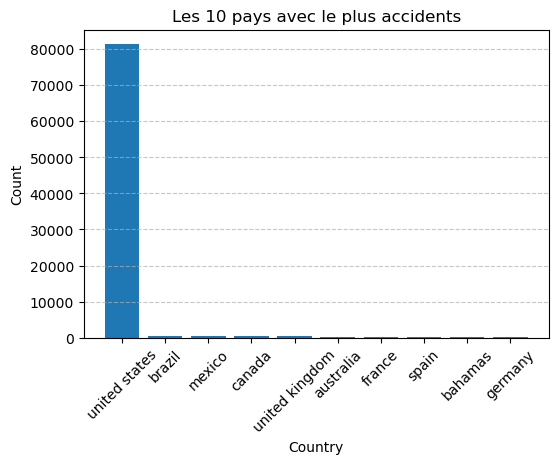

In [45]:
# top_10_Country 
top_10_Country = df["Country"].value_counts().head(10)

plt.figure(figsize=(6, 4))
bars = plt.bar(top_10_Country.index, top_10_Country.values)
plt.xlabel("Country")
plt.ylabel('Count')
plt.title("Les 10 pays avec le plus accidents")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show() 

Nous venons de voir que les USA répresentent le plus grand nombre des accidents avec un grand écart et a travers l'histogramme ci-dessus, on ne voit meme pas les autres pays, ce qui indique qu'on peut concentrer l'etude sur les USA, mais etant donné que notre étude va se concnetrer sur les modeles/type d'avion, on peut ne pas se concentrer l'ettude seulement au niveau du USA.

# Voyons l'evolution des accidents a travers le temps

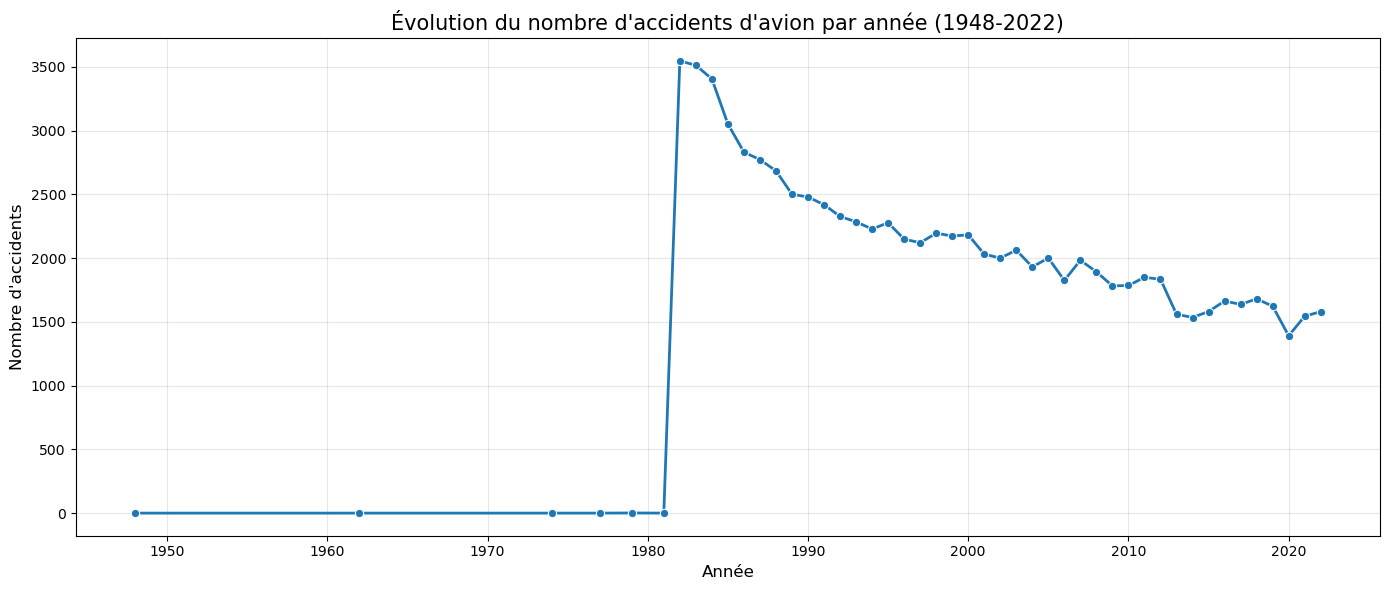

In [46]:
# Evolution des accidents
plt.figure(figsize=(14, 6))
yearly_accidents = df["Event.Year"].value_counts().sort_index()
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker='o', linewidth=2)
plt.title('Évolution du nombre d\'accidents d\'avion par année (1948-2022)', fontsize=15)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show() 

Ce graphique représente l'évolution des accidents d'avions au cours des années entre 1948 et 2022. Il y a une période où le nombre d'accidents est faible et stable, jusqu'au début des années 1980. Puis, apres 1980, on observe une forte augmentation, atteignant un pic d'environ 3500 accidents. Après ce pic, le nombre d'accidents diminue de manière significative et régulière, avec quelques fluctuations, pour atteindre un niveau plus stable autour de 1500 à 2000 accidents par an dans les années plus récentes. Puisqu'il y a une tendance stable de 1950 a 1980, alors faisons le graphique de 1980 a 2022

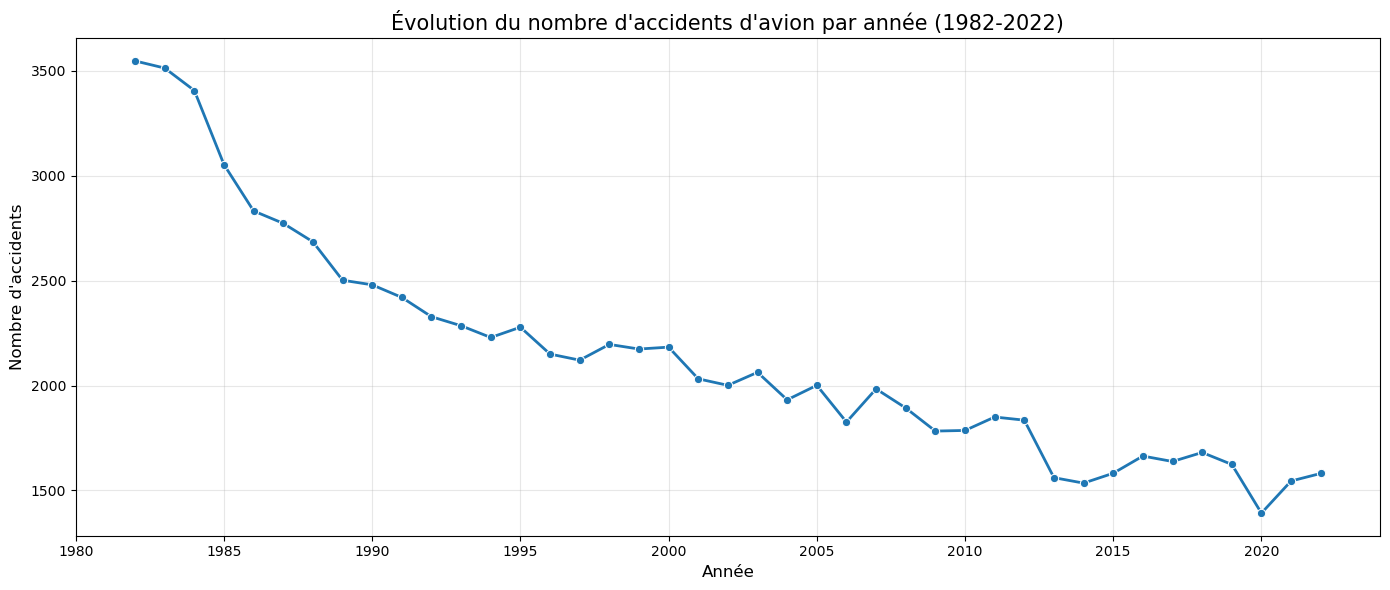

In [47]:
# Nombre d'accidents par année de 1982 a 2022
df = df[df['Event.Year'] >= 1982]
plt.figure(figsize=(14, 6))
yearly_accidents = df["Event.Year"].value_counts().sort_index()
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker='o', linewidth=2)
plt.title('Évolution du nombre d\'accidents d\'avion par année (1982-2022)', fontsize=15)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show() 

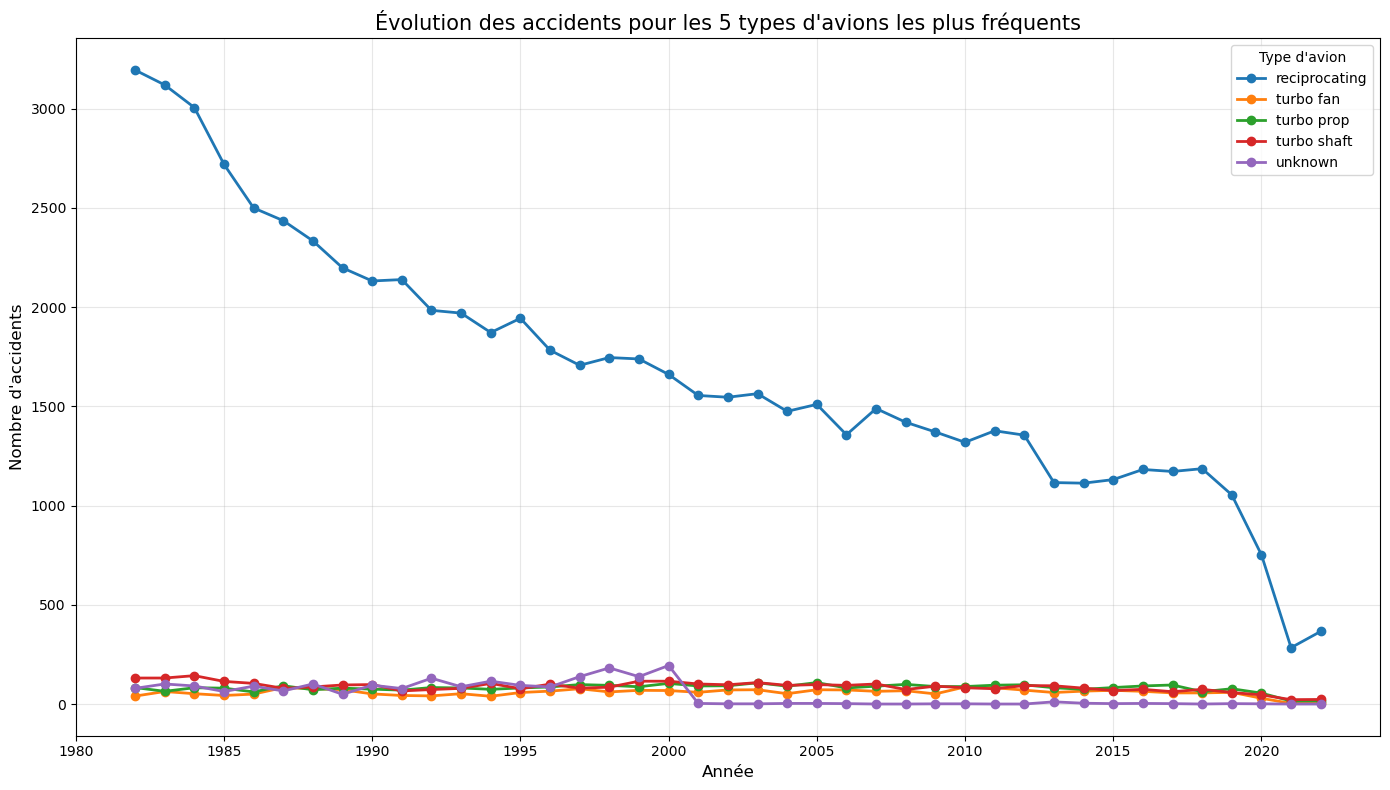

In [48]:
# Tendance des accidents par type d'avion (top 5)
df = df[df['Event.Year'] >= 1982]
plt.figure(figsize=(14, 8))
# Créer un dataframe avec année et type d'avion
top_aircraft_types = df['Engine.Type'].value_counts().nlargest(5).index
df_top_types = df[df['Engine.Type'].isin(top_aircraft_types)]

# Définir une liste de couleurs pour les lignes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']


year_column = df_top_types['Event.Year']

# Grouper par année et type d'avion
accidents_by_year_type = df_top_types.groupby([year_column, 'Engine.Type']).size().unstack()

# Remplir les valeurs manquantes par 0
accidents_by_year_type = accidents_by_year_type.fillna(0)

# Tracer les lignes pour chaque type d'avion
for i, aircraft_type in enumerate(accidents_by_year_type.columns):
    plt.plot(accidents_by_year_type.index, accidents_by_year_type[aircraft_type], 
             marker='o', linewidth=2, label=aircraft_type, color=colors[i % len(colors)])

plt.title('Évolution des accidents pour les 5 types d\'avions les plus fréquents', fontsize=15)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.legend(title='Type d\'avion', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show() 

Ce graphique représentant l'évolution du nombre d'accidents pour cinq types d'avions les plus fréquemment impliqués dans des accidents, sur une période allant d'environ 1982 à 2022. Le type d'avion "reciprocating" qui est en bleu a connu un pic d'accidents très élevé avant les années 1982, atteignant plus de 3000 accidents. Après cette période, une baisse progressive est observée, avec une chute significative autour de 2020. Les autres types d'avions comme : "turbo fan", "turbo prop", "turbo shaft" et "unknown" ont eu un nombre d'accidents beaucoup plus faible et relativement stable tout au long de la période, avec quelques petites fluctuations. La période après 1980 montre une baisse générale du nombre d'accidents pour tous les types, notamment pour le "reciprocating" qui dominait largement dans les années précédentes.

# Rapport entre les modeles et les nombres de victimes

Nous allons afficher le top10 Make_Model avec le plus grand nombre de personnes indemnes, le nombre de personne blesse et le nombre de fois ces Make_Models sont impliques dans des accidents (occurrence).

In [49]:
# 1) Créer une nouvelle colonne 'Total.Injuries' dans le DataFrame d'origine
df['Total.Injuries'] = df[['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Fatal.Injuries']].sum(axis=1)

In [50]:
# 2) Maintenant; regrouper par Make et Model, et agréger
summary_df = df.groupby(['Make', 'Model']).agg(
    Total_Uninjured=('Total.Uninjured', 'sum'),
    Total_Injuries=('Total.Injuries', 'sum'),
    Occurrences=('Make', 'size')  # ou 'size', selon ta logique
).reset_index() 

In [51]:
# 3) Trier par Total_Uninjured en ordre décroissant
summary_df = summary_df.sort_values(by='Total_Uninjured', ascending=False)

In [52]:
# 4) Afficher les 10 premiers
print(summary_df.head(10))

                    Make     Model  Total_Uninjured  Total_Injuries  \
3148              boeing       737          25101.0          1827.0   
3430              boeing       777           9415.0            50.0   
3376              boeing       767           6363.0           269.0   
3323              boeing   747-400           6011.0           166.0   
11468  mcdonnell douglas  dc-10-10           5840.0           458.0   
3345              boeing       757           4976.0           128.0   
11472  mcdonnell douglas  dc-10-30           4341.0           151.0   
3097              boeing   727-200           4164.0           108.0   
3266              boeing       747           3916.0            91.0   
3212              boeing   737-300           3887.0           251.0   

       Occurrences  
3148           484  
3430            91  
3376            67  
3323            28  
11468           35  
3345            58  
11472           22  
3097            42  
3266            83  
3212    

Donc, pour ces top10 Make_Model, nous allons determiner:
a) nombre moyen de blessés par accident
b) nombre moyen d’indemnes par accident
c) ratio de risque (Risk_Ratio


In [53]:
# Liste des Make_Model à conserver selon le tableau top10 Make_Model
top10_models = [
    ('boeing', '737'),
    ('mcdonnell douglas', 'dc-10-10'),
    ('boeing', '767'),
    ('boeing', '747-422'),
    ('boeing', '727-200'),
    ('boeing', '747-400'),
    ('mcdonnell douglas', 'dc-10-30'),
    ('boeing', '757-232'),  # Correction d'un espace avant 'boeing'
    ('boeing', '737-300'),
    ('mcdonnell douglas', 'dc-9-82')
]

In [54]:
# Correction d'éventuels espaces indésirables dans la colonne 'Make'
summary_df['Make'] = summary_df['Make'].str.strip()

In [55]:
# Filtrer le DataFrame selon la liste
filtered_df = summary_df[summary_df[['Make', 'Model']].apply(tuple, axis=1).isin(top10_models)].copy()

In [56]:
# Calculs complémentaires
filtered_df['Injured_per_Accident'] = filtered_df['Total_Injuries'] / filtered_df['Occurrences']
filtered_df['Uninjured_per_Accident'] = filtered_df['Total_Uninjured'] / filtered_df['Occurrences']
filtered_df['Risk_Ratio'] = filtered_df['Total_Injuries'] / (
    filtered_df['Total_Injuries'] + filtered_df['Total_Uninjured']
)

In [57]:
# Trier par Risk_Ratio croissant
filtered_df = filtered_df.sort_values(by='Risk_Ratio')

In [58]:
# Afficher le résultat
print(filtered_df[['Make', 'Model', 'Total_Uninjured', 'Total_Injuries', 'Occurrences',
                   'Injured_per_Accident', 'Uninjured_per_Accident', 'Risk_Ratio']])

                    Make     Model  Total_Uninjured  Total_Injuries  \
3327              boeing   747-422           3770.0            52.0   
3362              boeing   757-232           3340.0            48.0   
3097              boeing   727-200           4164.0           108.0   
3323              boeing   747-400           6011.0           166.0   
11472  mcdonnell douglas  dc-10-30           4341.0           151.0   
3376              boeing       767           6363.0           269.0   
11503  mcdonnell douglas   dc-9-82           3009.0           174.0   
3212              boeing   737-300           3887.0           251.0   
3148              boeing       737          25101.0          1827.0   
11468  mcdonnell douglas  dc-10-10           5840.0           458.0   

       Occurrences  Injured_per_Accident  Uninjured_per_Accident  Risk_Ratio  
3327            12              4.333333              314.166667    0.013605  
3362            23              2.086957              145.21

<Figure size 1200x600 with 0 Axes>

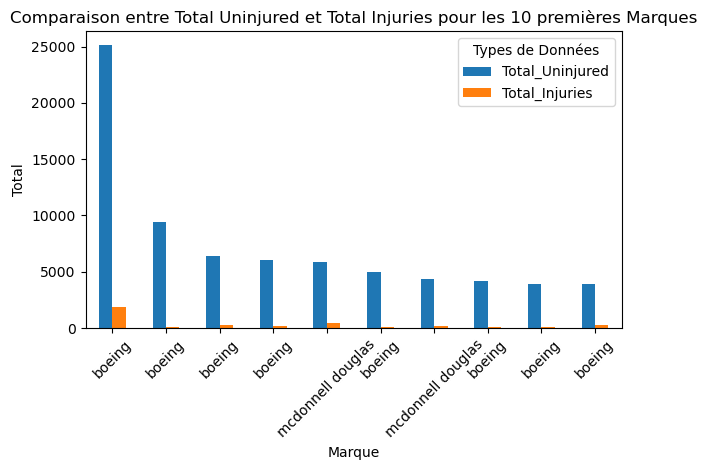

In [59]:
# Graphique représentant Total_Injuries et Total_Uninjured
plt.figure(figsize=(12, 6))
summary_df.set_index('Make').head(10)[['Total_Uninjured', 'Total_Injuries']].plot(kind='bar')
plt.title('Comparaison entre Total Uninjured et Total Injuries pour les 10 premières Marques')
plt.xlabel('Marque')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend(title='Types de Données')
plt.tight_layout()
plt.show()

# Diagramme en barres des conditions météorologiques
Il est vrai que le ratio nous permet de voir les Make_Model les plus sur, mais on va voir si les conditions meteorologiques n'influencent pas les accidents.

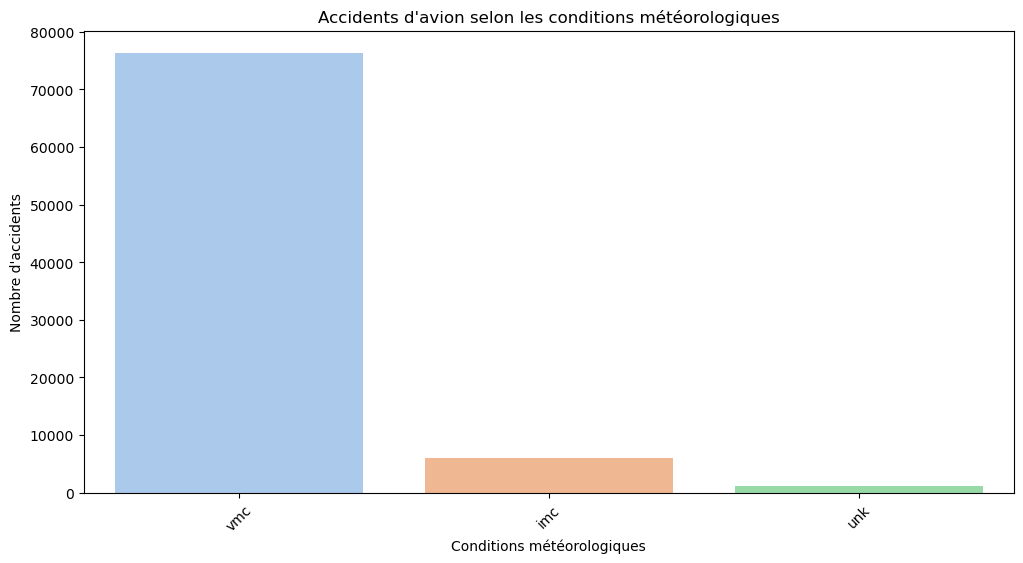

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Weather.Condition', palette='pastel')
plt.title('Accidents d\'avion selon les conditions météorologiques')
plt.xticks(rotation=45)
plt.xlabel('Conditions météorologiques')
plt.ylabel('Nombre d\'accidents')
plt.show() 

 Ce graphique montre le nombre d'accidents d'avion en fonction de différentes conditions météorologiques.

La condition météorologique "VMC" (Visual Meteorological Condition) est celle qui est associée au plus grand nombre d'accidents, avec environ 76 700 incidents.
La condition "imc" (Instrument Meteorological Conditions) a environ 6 700 accidents.
La condition "unk" (inconnu ou non spécifié) représente le plus faible nombre d'accidents, avec environ 1 200.

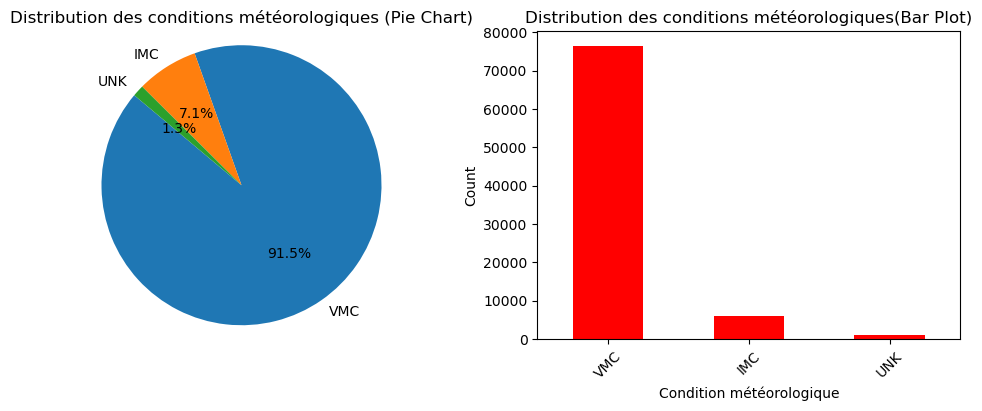

In [61]:
df['Weather.Condition'] = df['Weather.Condition'].str.upper()


weather_counts_updated = df['Weather.Condition'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


axes[0].pie(weather_counts_updated, labels=weather_counts_updated.index,autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution des conditions météorologiques (Pie Chart)')
axes[0].axis('equal')  



weather_counts_updated.plot(kind='bar', color='red', ax=axes[1])
axes[1].set_title('Distribution des conditions météorologiques(Bar Plot)')
axes[1].set_xlabel('Condition météorologique')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

VMC: représente 91,5% du total, donc la majorité des conditions météorologiques observées sont associées à la VMC. IMC : représente 7,1%. UNK qui est Inconnu : représente 1,3%, indiquant une part très faible de données non spécifiées.

# Analyse des avions construits par des amateurs

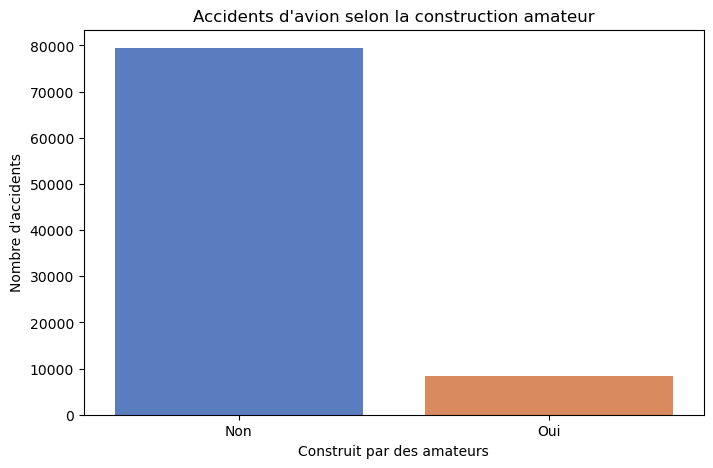

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Amateur.Built', palette='muted')
plt.title('Accidents d\'avion selon la construction amateur')
plt.xlabel('Construit par des amateurs')
plt.ylabel('Nombre d\'accidents')
plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'])
plt.show()

Le graphique montre le nombre d'accidents d'avion en fonction de la construction par des amateurs.

La grande majorité des accidents, environ 80 000, concerne des avions qui n'ont pas été construits par des amateurs.
En revanche, les accidents liés aux avions construits par des amateurs sont beaucoup moins fréquents, avec environ 8 000 accidents.
Mais cela ne suggere pas que les avions construits par des amateurs sont plus sur, car c'est le Risk_Ratio qui qui peut donner le resultat plus sur. on fait ce graphique dans l'objectif de voir a quel point que les avions a,ateurs sont impliques dans les accidents. 

# Matrice de corrélation

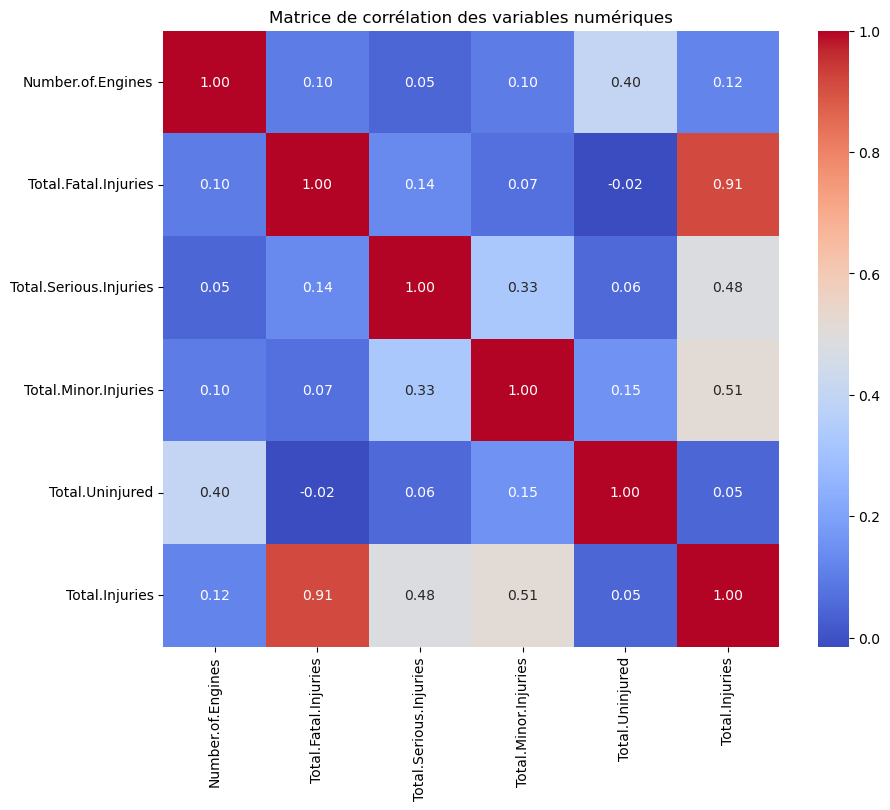

In [63]:
# Identifier les colonnes numériques uniquement
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns

# Calculer la matrice de corrélation uniquement sur les colonnes numériques
correlation_matrix = df[colonnes_numeriques].corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matrice de corrélation des variables numériques')
plt.show() 

La corrélation entre le nombre de moteurs et le nombre de blessures graves est très faible (0.05), indiquant peu ou pas de relation linéaire entre ces deux variables.
La corrélation la plus forte est entre le total des blessures mineures et le total des blessures graves (0.33), suggérant que lorsque le nombre de blessures mineures augmente, il y a également une tendance à augmenter le nombre de blessures graves, mais cette relation est plus ou moins modérée.
La variable total des blessés non indemnisés a une faible corrélation avec les autres variables, sauf avec le nombre de moteurs (-0.02), ce qui indique une très faible ou aucune relation.
Donc, ces variables semblent peu ou pas fortement corrélées entre elles, sauf une relation modérée entre les blessures graves et mineures. Cela pourrait indiquer que ces variables varient indépendamment, ou que des relations non linéaires ou d'autres facteurs influencent ces accidents.

Total.Uninjured: est fortement corrélée négativement avec Make (-0.95), ce qui pourrait indiquer que certaine marque a très peu ou beaucoup de non blessés.
Weather Condition: (Condition météorologique) ne semble pas avoir une forte corrélation avec d'autres variables, ce qui peut indiquer peu d'impact direct ou une variabilité selon d'autres facteurs.

La présence d'une corrélation negative forte entre "Make" et "Total.Uninjured" pourrait suggérer une relation intéressante entre la marque et le nombre de personnes indemnes.

# Conclusion:

En conclusion, nous vons choisi le Risk_Ratio comment l'indicateur le plus fiable pour dertimner quel modele d'avions le plus sur. Et ce choix est avere par les correlations entre la variable du nombre de personnes indemenes et les les Make_Model. Ce qui indique qu'il y a une relation entre les Make_Model et le nombre de victimes. Notre Entreprise Sky_Horizon fera mieux de choisir en se basant sur le Risk_Ratio, nous avons presente les 10 modeles les plus sur par ordre.